# DATASET 3 MODEL TRAINING

## 50% phishing - 6,000 URLs | 50% benign - 6,000 URLs

## Chosen Dataset

## Import Library

In [1]:
# Fix random seeds for Reproducibility

from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(2)

In [2]:
import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [3]:
# data
import numpy as np
import pandas as pd
from sklearn.utils import shuffle


from sklearn.model_selection import train_test_split

#visualization
import seaborn as sns
from matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#evaluation, analyzing results
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#demonstration of calculating metrics for a neural network model using sklearn
import tensorflow.keras as k

#train neural network
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print(tf.__version__)


Instructions for updating:
non-resource variables are not supported in the long term
2.4.0


## Importing the dataset

In [4]:

dataset = pd.read_csv("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Extracted CSVs/from FeatureExtraction/Data-3/D3_finaldata_updated.csv")

#dataset = pd.read_csv("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Feature-Extraction-ntbk/FE-more-data/final-testdata.csv")


In [5]:
dataset

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,29,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,1,21,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,8,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,1,6,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,polska-olx.pl,0,0,0,2,0,0,0,1,0,1,1,1,0,6,0,1
11996,fb-updates-1000151020200412545154000588-mc.tk,0,0,1,1,0,0,0,1,0,1,1,1,0,4,0,1
11997,whattsapps.misecure.com,0,0,0,0,0,0,0,0,0,0,0,1,0,4,1,1
11998,nfta.co.za,0,0,1,2,0,0,0,0,0,1,1,1,1,5,1,1


In [6]:
# Look for missing values
dataset.isnull().sum()   

# No missing values found, so no need to drop or replace any value

domain               0
ip_present           0
at_present           0
url_length           0
url_depth            0
redirection          0
https_domain         0
short_url            0
prefix/suffix        0
dns_record           0
web_traffic          0
domain_age           0
domain_end           0
dot_count            0
specialchar_count    0
subdom_count         0
label                0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    6000
1    6000
Name: label, dtype: int64

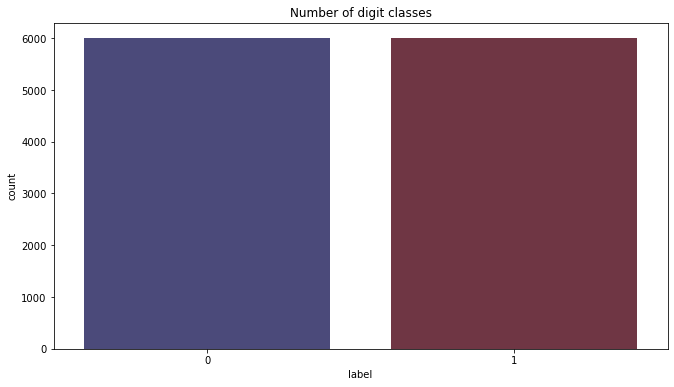

In [7]:
# visualize number of label classes

plt.figure(figsize=(11,6))
g = sns.countplot(dataset['label'], palette="icefire")
plt.title("Number of digit classes")
dataset['label'].value_counts()

In [8]:
# Shuffle
# shuffle dataset **once**, but reliably so that each run yields the same results

dataset_shuffle = shuffle(dataset, random_state=42)

dataset_shuffle

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
1935,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,0,6,0,0
6494,78.143.96.35,0,0,1,3,0,0,0,0,0,1,0,1,1,19,1,1
1720,superuser.com,0,0,1,3,0,0,0,0,0,1,0,1,0,6,0,0
9120,heylink.me,0,0,0,1,0,0,1,0,0,1,0,1,0,4,0,1
360,torrentdn.com,0,0,1,2,0,0,0,0,0,1,1,1,0,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,vmi330298.contaboserver.net,0,0,0,3,0,0,0,0,0,1,0,1,1,6,1,1
5191,censor.net.ua,0,0,1,3,0,0,0,0,0,0,0,1,0,17,1,0
5390,udn.com,0,0,1,4,0,0,0,0,0,1,0,1,0,7,0,0
860,seekingalpha.com,0,0,1,2,0,0,0,0,0,1,0,1,0,5,0,0


In [9]:
# Separating & assigning features and target columns to X & y

y = dataset_shuffle['label']
X = dataset_shuffle.drop(['domain', 'label'], axis=1)


X.shape, y.shape

((12000, 15), (12000,))

# Split Train/Val/Test

In [10]:
# Spliting the dataset into Training, Validation, and Test Set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


X_train.shape, X_test.shape, X_val.shape

((7200, 15), (2400, 15), (2400, 15))

In [11]:
# Converting target variables from dataframe to an array

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y_val = np.ravel(y_val)

In [12]:
## Normalize data using StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


In [13]:

print(X_train)
print('')
print(type(X_train))


[[ 0.         -0.15875423  0.6103067  ... -0.55467501 -0.38284257
  -0.63285523]
 [ 0.         -0.15875423  0.6103067  ... -0.55467501  2.9243725
  -0.63285523]
 [ 0.         -0.15875423  0.6103067  ... -0.55467501 -0.1883005
   1.58014022]
 ...
 [ 0.         -0.15875423  0.6103067  ... -0.55467501 -0.38284257
  -0.63285523]
 [ 0.         -0.15875423 -1.63852044 ...  1.8028575  -0.77192669
   1.58014022]
 [ 0.         -0.15875423  0.6103067  ... -0.55467501 -0.38284257
   1.58014022]]

<class 'numpy.ndarray'>


In [14]:
print(X_train.shape)

print(X_test.shape)

print(X_val.shape)


(7200, 15)
(2400, 15)
(2400, 15)


In [15]:

## Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")

print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 12000 rows and 15 columns

Dimensions of the training dataset : 7200 rows and 15 columns

Dimensions of the testing dataset : 2400 rows and 15 columns

Dimensions of the validation dataset : 2400 rows and 15 columns



## Machine Learning Models & Training

In [16]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
acc_val = []

#function to call for storing the results
def storeResults(model, a,b,c):
    ML_Model.append(model)
    acc_train.append("{:.2f}%" .format (a, 2))
    acc_test.append("{:.2f}%" .format (b, 2))
    acc_val.append("{:.2f}%" .format (c, 2))
    
   

## Decision Tree

In [17]:
## Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

## instantiate the DecisionTreeClassifier model with criterion gini index
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

## fit the model 
tree.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_pred_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
y_val_tree = tree.predict(X_val)


## Computing the accuracy of the model performance
acc_train_tree = (accuracy_score(y_train,y_train_tree)*100)
acc_pred_tree = (accuracy_score(y_test,y_pred_tree)*100)
acc_val_tree = (accuracy_score(y_val,y_val_tree)*100)

print("Decision Tree: Accuracy on training Data: %.2f%%" % (acc_train_tree))
print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_pred_tree))
print("Decision Tree: Accuracy on validation Data: %.2f%%" % (acc_val_tree))

      
#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set



#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(tree.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(tree.score(X_test, y_test) * 100,2), "%")


Decision Tree: Accuracy on training Data: 86.76%
Decision Tree: Accuracy on TEST Data: 86.83%
Decision Tree: Accuracy on validation Data: 87.42%


In [18]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.

storeResults('Decision Tree', acc_train_tree, acc_pred_tree, acc_val_tree )


## Decision Tree Report on Test Data

In [73]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Decision Tree on Test Data')
print('')

print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_pred_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_test, y_pred_tree))



Performance Evaluation of Decision Tree on Test Data

Decision Tree: Accuracy on TEST Data: 86.83%

Decision Tree Confusion Matrix:
[[1117  114]
 [ 202  967]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1231
           1       0.89      0.83      0.86      1169

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



In [76]:
print('Decision Tree Test Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_tree)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_pred_tree)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_pred_tree)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_pred_tree)
print('F1 score: %.2f%%' % f1)



Decision Tree Test Data
Accuracy: 0.87%
Precision: 0.89%
Recall: 0.83%
F1 score: 0.86%


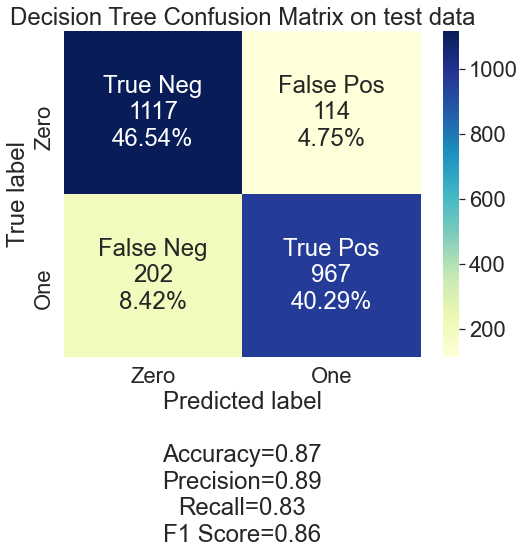

In [99]:
tree_matrix_test = confusion_matrix(y_test, y_pred_tree)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Decision Tree Confusion Matrix on test data'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))

## Decision Tree Report on Training Data

In [100]:
## Classification Report - complete
## Predict the values from the training set

print('Performance Evaluation of Decision Tree on Training Data')
print('')

print("Decision Tree: Accuracy on Training Data: %.2f%%" % (acc_train_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_train, y_train_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_train, y_train_tree))



Performance Evaluation of Decision Tree on Training Data

Decision Tree: Accuracy on Training Data: 86.76%

Decision Tree Confusion Matrix:
[[3247  353]
 [ 600 3000]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3600
           1       0.89      0.83      0.86      3600

    accuracy                           0.87      7200
   macro avg       0.87      0.87      0.87      7200
weighted avg       0.87      0.87      0.87      7200



In [101]:
print('Decision Tree Training Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_tree)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_tree)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_tree)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_tree)
print('F1 score: %.2f%%' % f1)


#Observation: Individual calculations per metric are different from the CM table since 
#these formula actually looks or compute at class 1 by default


Decision Tree Training Data
Accuracy: 0.87%
Precision: 0.89%
Recall: 0.83%
F1 score: 0.86%


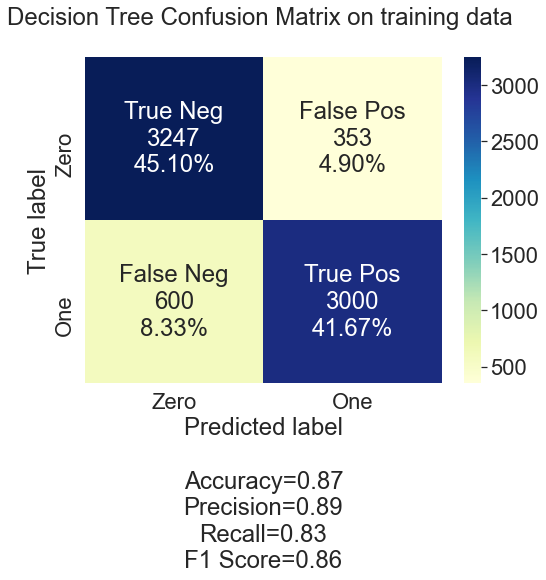

In [135]:

##Get the confusion matrix
tree_matrix_train = confusion_matrix(y_train, y_train_tree)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Decision Tree Confusion Matrix on training data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_train, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


# Random Forest

In [27]:
## Random Forest model
from sklearn.ensemble import RandomForestClassifier

## instantiate the model
forest = RandomForestClassifier(n_estimators=1, min_samples_leaf=6, random_state=42)

## fit the model 
forest.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_pred_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
y_val_forest = forest.predict(X_val)


## Computing the accuracy of the model performance
acc_train_forest = (accuracy_score(y_train,y_train_forest)*100)
acc_pred_forest = (accuracy_score(y_test,y_pred_forest)*100)
acc_val_forest = (accuracy_score(y_val,y_val_forest)*100)

print("Random Forest: Accuracy on training Data: %.2f%%" % (acc_train_forest))
print("Random Forest: Accuracy on TEST Data: %.2f%%" % (acc_pred_forest))
print("Random Forest: Accuracy on validation Data: %.2f%%" % (acc_val_forest))


#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set



#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(forest.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(forest.score(X_test, y_test) * 100,2), "%")


Random Forest: Accuracy on training Data: 91.25%
Random Forest: Accuracy on TEST Data: 90.75%
Random Forest: Accuracy on validation Data: 90.29%


In [28]:
# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_pred_forest, acc_val_forest)


## Random Forest Report on Test Data

In [110]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Random Forest on Test Data')
print('')

print("Random Forest: Accuracy on TEST Data: %.2f%%" % (acc_pred_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_test, y_pred_forest))



Performance Evaluation of Random Forest on Test Data

Random Forest: Accuracy on TEST Data: 90.75%

Random Forest Confusion Matrix:
[[1158   73]
 [ 149 1020]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1231
           1       0.93      0.87      0.90      1169

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



In [84]:
print('Random Forest Test Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_forest)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_pred_forest)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_pred_forest)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_pred_forest)
print('F1 score: %.2f%%' % f1)



Random Forest Test Data
Accuracy: 0.91%
Precision: 0.93%
Recall: 0.87%
F1 score: 0.90%


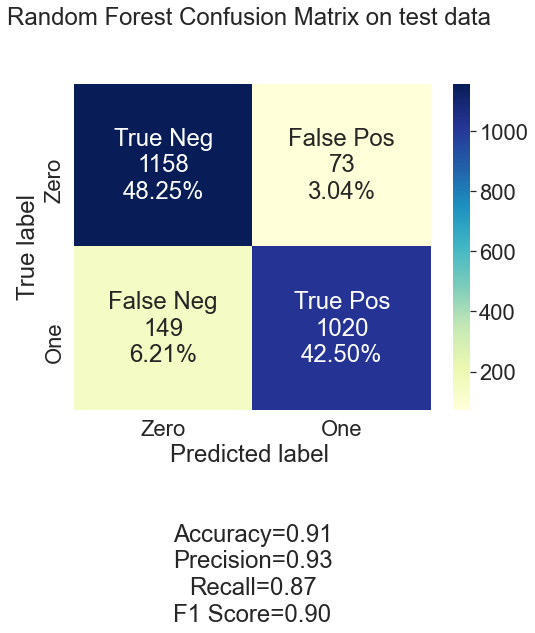

In [137]:

##Get the confusion matrix
forest_matrix_test = confusion_matrix(y_test, y_pred_forest)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Random Forest Confusion Matrix on test data \n\n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label \n' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


## Random Forest Report on Training Data

In [109]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Random Forest on Training Data')
print('')

print("Random Forest: Accuracy on Training Data: %.2f%%" % (acc_train_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_train, y_train_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_train, y_train_forest))



Performance Evaluation of Random Forest on Training Data

Random Forest: Accuracy on Training Data: 91.25%

Random Forest Confusion Matrix:
[[3391  209]
 [ 421 3179]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3600
           1       0.94      0.88      0.91      3600

    accuracy                           0.91      7200
   macro avg       0.91      0.91      0.91      7200
weighted avg       0.91      0.91      0.91      7200



In [106]:
print('Random Forest Training Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_forest)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_forest)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_forest)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_forest)
print('F1 score: %.2f%%' % f1)



Random Forest Training Data
Accuracy: 0.91%
Precision: 0.94%
Recall: 0.88%
F1 score: 0.91%


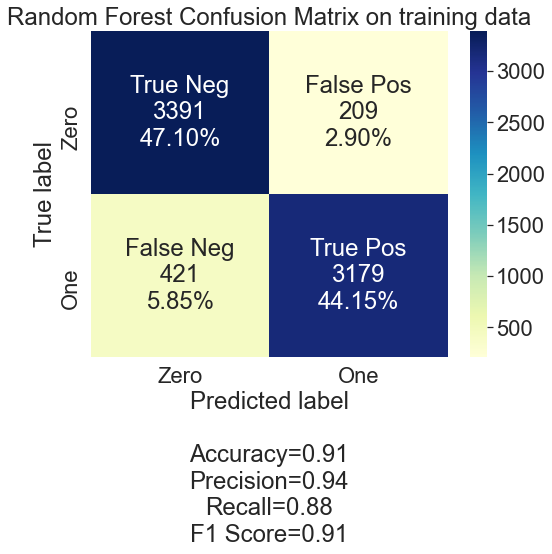

In [108]:

##Get the confusion matrix
forest_matrix_train = confusion_matrix(y_train, y_train_forest)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Random Forest Confusion Matrix on training data'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_train, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


## CNN Model

In [34]:
#importing required packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPool1D, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

In [35]:
# Reshaping data as expected by Sequential model
# convert to 3 dim array

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("3 dim array as expected by cnn model")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_val:", X_val.shape)


3 dim array as expected by cnn model
X_train: (7200, 15, 1)
X_test: (2400, 15, 1)
X_val: (2400, 15, 1)


## Evaluating CNN Model Traditionally (No KFold or Cross Validation)

In [36]:
# CNN model

#importing required packages

import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [37]:
tf.random.set_random_seed(2)
#tf.random.set_seed(2)
#tf.random.set_seed(SEED)


# Model configuration
ADAM = Adam(learning_rate=0.0001)
verbosity = 2
l1 = regularizers.l1(0.0001)

INPUT_DIM = X_train[0].shape
                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(20, 3, activation='relu', input_shape = INPUT_DIM))
proposed.add(BatchNormalization())
proposed.add(Dropout(0.2))

#--Convo Layer 1
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPooling1D(2, name="POOLING_1"))

#--Convo Layer 2
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(40, 5, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPooling1D(2, name="POOLING_2", padding='same'))

#--Convo Layer 5
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_5", kernel_regularizer=l1))
#--Convo Layer 6
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_6"))
#--Convo Layer 7
proposed.add(Conv1D(160, 3, activation='relu', padding='same', name="CONV_7"))
proposed.add(MaxPooling1D(2, name="POOLING_3", padding='same'))
proposed.add(Dropout(0.4, name="DROPOUT_1"))

##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))

##--First Fully Connected Layer 5
proposed.add(Dense(128, activation='relu', name='DENSE_1', kernel_regularizer=l1))

proposed.add(Dense(64, activation='relu', name='DENSE_2'))
proposed.add(Dropout(0.5, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])


In [38]:
proposed.summary()

Model: "Proposed_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 13, 20)            80        
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 20)            80        
_________________________________________________________________
dropout (Dropout)            (None, 13, 20)            0         
_________________________________________________________________
CONV_1 (Conv1D)              (None, 13, 20)            1220      
_________________________________________________________________
POOLING_1 (MaxPooling1D)     (None, 6, 20)             0         
_________________________________________________________________
CONV_2 (Conv1D)              (None, 6, 40)             2440      
_________________________________________________________________
CONV_3 (Conv1D)              (None, 6, 40)          

In [39]:

## Train the Model

print('Building model... \n')

history = proposed.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    batch_size=128, epochs=80, verbose=2)

# Score metrics from the model
print('')
score = proposed.evaluate(X_test, y_test, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))



Building model... 

Train on 7200 samples, validate on 2400 samples
Epoch 1/80
7200/7200 - 1s - loss: 0.9690 - acc: 0.5707 - val_loss: 0.9619 - val_acc: 0.7371


/Users/jillkathleen/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 2/80
7200/7200 - 1s - loss: 0.7873 - acc: 0.8004 - val_loss: 0.7722 - val_acc: 0.8583
Epoch 3/80
7200/7200 - 1s - loss: 0.6374 - acc: 0.8656 - val_loss: 0.6574 - val_acc: 0.8863
Epoch 4/80
7200/7200 - 1s - loss: 0.6033 - acc: 0.8711 - val_loss: 0.6071 - val_acc: 0.8933
Epoch 5/80
7200/7200 - 1s - loss: 0.5822 - acc: 0.8771 - val_loss: 0.5705 - val_acc: 0.8992
Epoch 6/80
7200/7200 - 1s - loss: 0.5615 - acc: 0.8817 - val_loss: 0.5420 - val_acc: 0.8904
Epoch 7/80
7200/7200 - 1s - loss: 0.5417 - acc: 0.8854 - val_loss: 0.5185 - val_acc: 0.8904
Epoch 8/80
7200/7200 - 1s - loss: 0.5337 - acc: 0.8882 - val_loss: 0.4992 - val_acc: 0.9025
Epoch 9/80
7200/7200 - 1s - loss: 0.5116 - acc: 0.8888 - val_loss: 0.4871 - val_acc: 0.9033
Epoch 10/80
7200/7200 - 1s - loss: 0.5021 - acc: 0.8975 - val_loss: 0.4800 - val_acc: 0.9033
Epoch 11/80
7200/7200 - 1s - loss: 0.4943 - acc: 0.8919 - val_loss: 0.4703 - val_acc: 0.9050
Epoch 12/80
7200/7200 - 1s - loss: 0.4839 - acc: 0.8964 - val_loss: 0.4610 - v

In [40]:

## Evaluate model scores

acc_train_cnn = (proposed.evaluate(X_train, y_train)[1]*100)
acc_pred_cnn = (proposed.evaluate(X_test, y_test)[1]*100)
acc_val_cnn = (proposed.evaluate(X_val, y_val)[1]*100)

print("batch_size=128, epochs=80")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_pred_cnn))
print("CNN: Accuracy on validation Data: %.2f%%" % (acc_val_cnn))



batch_size=128, epochs=80

CNN: Accuracy on training Data: 93.64%
CNN: Accuracy on TEST Data: 93.42%
CNN: Accuracy on validation Data: 92.50%


In [41]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_pred_cnn, acc_val_cnn)


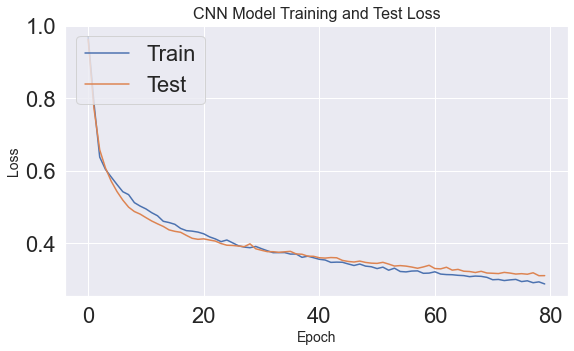

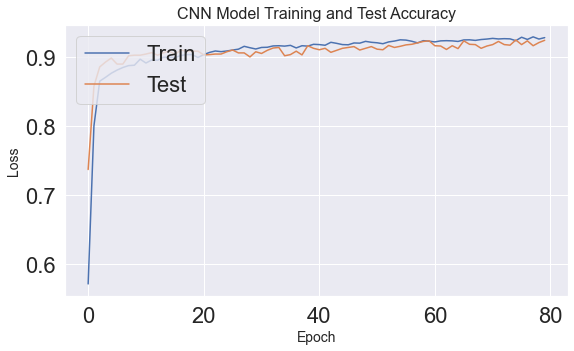

In [42]:
## As shown in docu

## Plot training & test loss values
## Computing Loss Result on Training And Test Results
plt.figure(figsize=(9,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Training and Test Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/val-loss.png')
plt.show()


## Plot training & test accuracy values
## Computing Accuracy on Training And Test Results
plt.figure(figsize=(9,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Model Training and Test Accuracy', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/test-acc-docu.png')
plt.show()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


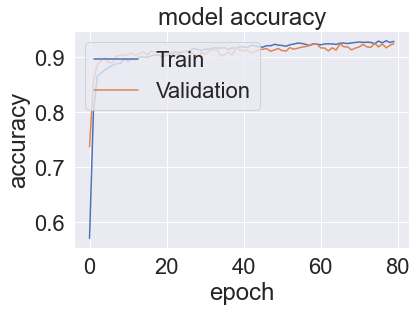

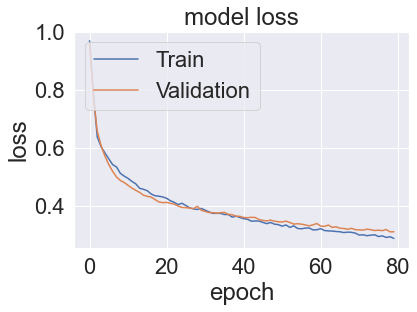

In [43]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Test CNN Model

## CNN Report on Test Data

In [112]:
# Predicting results for test dataset
y_pred_cnn = proposed.predict(X_test)

# Predicting results for tain dataset
y_train_cnn = proposed.predict(X_train)


# Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels
# Solution, round off the output which will convert the float values into an integer
# use np.argmax() to select the index number which has a higher value in a row


In [113]:
y_train_cnn = np.argmax(np.round(y_train_cnn),axis=1)

y_pred_cnn = np.argmax(np.round(y_pred_cnn),axis=1)


y_pred_cnn, y_train_cnn

(array([1, 0, 0, ..., 1, 1, 0]), array([0, 0, 1, ..., 0, 1, 0]))

In [114]:

y_pred_cnn.shape, y_test.shape


((2400,), (2400,))

In [119]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of CNN on Test Data')
print('')

print("CNN: Accuracy on Test Data: %.2f%%" % (acc_pred_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_test, y_pred_cnn))

print('')
score = proposed.evaluate(X_test, y_test, verbose=1)
print('Score Results: Loss, Accuracy',score)

Performance Evaluation of CNN on Test Data

CNN: Accuracy on Test Data: 93.42%

CNN Confusion Matrix:
[[1199   32]
 [ 126 1043]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1231
           1       0.97      0.89      0.93      1169

    accuracy                           0.93      2400
   macro avg       0.94      0.93      0.93      2400
weighted avg       0.94      0.93      0.93      2400


Score Results: Loss, Accuracy [0.2798362093170484, 0.93416667]


In [121]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of CNN on Testing Data')

print('')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_cnn)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_pred_cnn)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_pred_cnn)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_pred_cnn)
print('F1 score: %.2f%%' % f1)


print('\n')
print('F1 score: %.2f%%' % (f1*100))
print('Recall: %.2f%%' % (recall*100))
print('Precision: %.2f%%' % (precision*100))
print('Accuracy: %.2f%%' % (accuracy*100))

Performance Evaluation of CNN on Testing Data

Accuracy: 0.93%
Precision: 0.97%
Recall: 0.89%
F1 score: 0.93%


F1 score: 92.96%
Recall: 89.22%
Precision: 97.02%
Accuracy: 93.42%


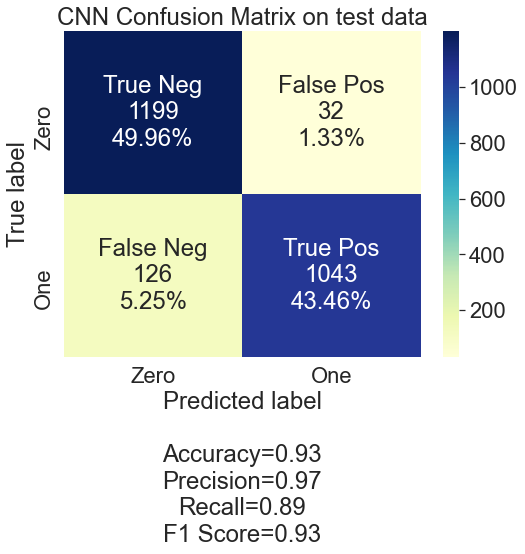

In [123]:

##Get the confusion matrix
cnn_matrix_test = confusion_matrix(y_test, y_pred_cnn)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='CNN Confusion Matrix on test data'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


## CNN Report on Training Data

In [126]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of CNN on Training Data')
print('')

print("CNN: Accuracy on Training Data: %.2f%%" % (acc_train_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_train, y_train_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_train, y_train_cnn))

print('')
score = proposed.evaluate(X_train, y_train, verbose=1)
print('Score Results: Loss, Accuracy',score)

Performance Evaluation of CNN on Training Data

CNN: Accuracy on Training Data: 93.64%

CNN Confusion Matrix:
[[3508   92]
 [ 366 3234]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3600
           1       0.97      0.90      0.93      3600

    accuracy                           0.94      7200
   macro avg       0.94      0.94      0.94      7200
weighted avg       0.94      0.94      0.94      7200


Score Results: Loss, Accuracy [0.26947251346376205, 0.9363889]


In [128]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of CNN on Training Data')

print('')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_cnn)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_cnn)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_cnn)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_cnn)
print('F1 score: %.2f%%' % f1)


print('\n')
print('F1 score: %.2f%%' % (f1*100))
print('Recall: %.2f%%' % (recall*100))
print('Precision: %.2f%%' % (precision*100))
print('Accuracy: %.2f%%' % (accuracy*100))

Performance Evaluation of CNN on Training Data

Accuracy: 0.94%
Precision: 0.97%
Recall: 0.90%
F1 score: 0.93%


F1 score: 93.39%
Recall: 89.83%
Precision: 97.23%
Accuracy: 93.64%


## Predicted vs Actual Results

In [129]:
## Compare actual and expected values

## The complete example below makes predictions for each example in the dataset, then prints the input data, predicted class and expected class for the first 5 examples in the dataset.
# make class predictions with the model
#predict = proposed.predict_classes(X_test)
# summarize the first 5 cases

m=0
for i in range(len(X_test)):
    if y_pred_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (y_pred_cnn[i], y_test[i]))
    

Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
P

Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
P

In [130]:
y_pred_cnn

array([1, 0, 0, ..., 1, 1, 0])

# Comparison of Models

In [131]:
acc_train, acc_test, acc_val

(['86.76%', '91.25%', '93.64%'],
 ['86.83%', '90.75%', '93.42%'],
 ['87.42%', '90.29%', '92.50%'])

In [132]:
results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test,
    'Val Accuracy':   acc_val})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 3 Results")
align_df

Dataset 3 Results


,ML Model,Train Accuracy,Test Accuracy,Val Accuracy
1,Decision Tree,86.76%,86.83%,87.42%
2,Random Forest,91.25%,90.75%,90.29%
3,CNN,93.64%,93.42%,92.50%


In [133]:
#Sorting the dataframe on accuracy
index_df.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Val Accuracy
3,CNN,93.64%,93.42%,92.50%
2,Random Forest,91.25%,90.75%,90.29%
1,Decision Tree,86.76%,86.83%,87.42%


In [59]:

#reference

""""def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_test,pred_cnn)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_test,pred_cnn,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_test,pred_cnn)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

IndentationError: unexpected indent (<ipython-input-59-ff8ce4b73ae5>, line 9)

## Complete - End